# Visualize Stereoscopic Dataset

To confirm the outputs are good

## Imports

In [1]:
import os
from PIL import Image
import numpy as np
import random

# Input and output folders
image_input_folder = 'all_clean/images'
label_input_folder = 'all_clean/labels'
output_image_folder = 'cropped_all/images'
output_label_folder = 'cropped_all/labels'

# Ensure the output folder exists
# os.makedirs(output_folder, exist_ok=True)


## Variables

In [2]:
mu = 0  # Mean (center)
sigma = 25  # Standard deviation (controls the spread)

In [3]:
# List all PNG files in the input folder
png_files = [file for file in os.listdir(label_input_folder) if file.endswith('.png')]

## Create Crops

In [ ]:
count = 0
for png_file in png_files:
    # Load the PNG image from the "labels/" folder
    orig = Image.open(os.path.join(image_input_folder, png_file))
    img = Image.open(os.path.join(label_input_folder, png_file))
    
    # Convert the image to a NumPy array for easier processing
    orig_array = np.array(orig)
    img_array = np.array(img)
    
    # Treat the green channel as a mask and find the coordinates of non-zero pixels
    mask_coordinates = np.argwhere(img_array[:, :, 1] > 0)
    
    # Calculate the bounding box from the mask coordinates
    min_y, min_x = np.min(mask_coordinates, axis=0)
    max_y, max_x = np.max(mask_coordinates, axis=0)
    
    shift_x = int(random.gauss(mu, sigma))
    shift_y = int(random.gauss(mu, sigma))
    
    zoom_mean = 75
    zoom_sigma = 10

    zoom = int(random.gauss(zoom_mean, zoom_sigma))
    
    min_y = np.clip(int(min_y - zoom + shift_y), 0, img.size[0])
    min_x = np.clip(int(min_x - zoom + shift_x), 0, img.size[1])
    max_y = np.clip(int(max_y + zoom + shift_y), 0, img.size[0])
    max_x = np.clip(int(max_x + zoom + shift_x), 0, img.size[1])
    
    # Crop the image using the bounding box coordinates
    cropped_orig = Image.fromarray(orig_array[min_y:max_y+1, min_x:max_x+1])
    cropped_orig = cropped_orig.resize((512,512))
    cropped_img = Image.fromarray(img_array[min_y:max_y+1, min_x:max_x+1])
    cropped_img = cropped_img.resize((512,512))

    # Save the cropped image with the same file name in the output folder
    output_image_file = os.path.join(output_image_folder, png_file)
    cropped_orig.save(output_image_file)
    output_label_file = os.path.join(output_label_folder, png_file)
    cropped_img.save(output_label_file)
    
    print(count)
    count += 1



## View Output

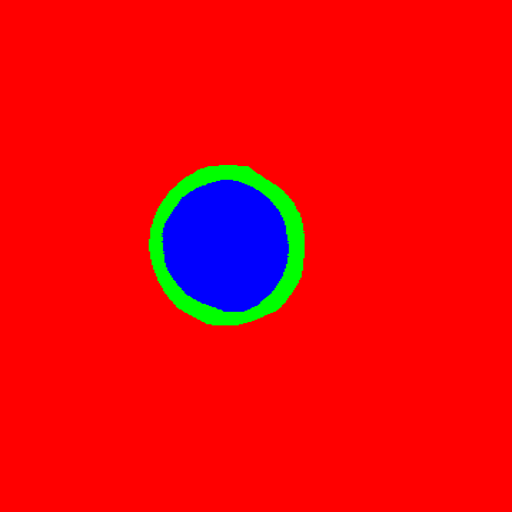

In [85]:
cropped_img

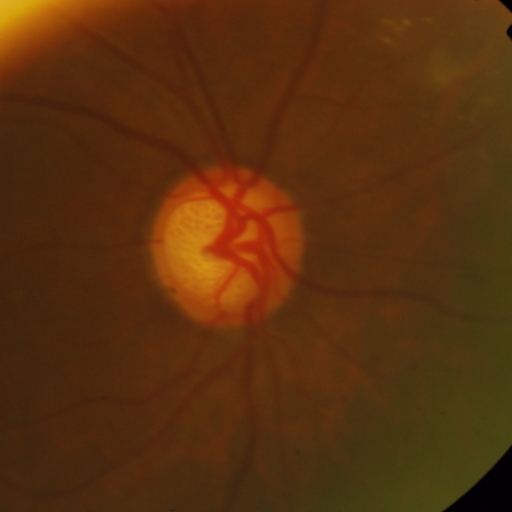

In [86]:
cropped_orig